Digital Business University of Applied Sciences

Data Science und Management (M. Sc.)

MALE01 Machine Learning

Prof. Dr. Daniel Ambach

Julia Schmid (200022)

***
#    Vergleich von Methoden zur Behebung unausgeglichener Datensätze und deren Einfluss auf Machine Learning Modelle
***

In diesem Jupyter-Notebook werden verschiedene Methoden zur Begebung von unausgeglichenen Datensätze auf die Machine Learning Modelle Random Forest, Logistische Regression und XGBoost angwendet und miteinander verglichen und evaluiert. 

In [135]:
# Importe
import os
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import balanced_accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler

## **Daten verstehen** 

### Daten einlesen

In [136]:
# Konfiguration
# input = "/Users/juliaschmid/Desktop/MALE01_TEST/"
# INPUT_FILE = os.path.join(input, "cs-training.csv")
# PROFILE_FILE = os.path.join(input, "hotel_bookings.html")

# Quelle Datensatz: # https://www.kaggle.com/c/GiveMeSomeCredit/data?select=cs-training.csv

INPUT_FILE = "cs-training.csv"

df = pd.read_csv(INPUT_FILE, encoding='latin1')

### Daten beschreiben

In [137]:
# Ausgabe der ersten 5 Zeilen
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [138]:
# Ausgabe der Anzahl der Zeilen und Spalten
print(f'Anzahl Zeilen: {df.shape[0]}')
print(f'Anzahl Spalten: {df.shape[1]}')

Anzahl Zeilen: 150000
Anzahl Spalten: 12


In [139]:
# Ausgabe der Datensatz-Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [140]:
# Ausgabe der Statistischenkennzahlen der numerischen Variablen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


### Daten visualisieren

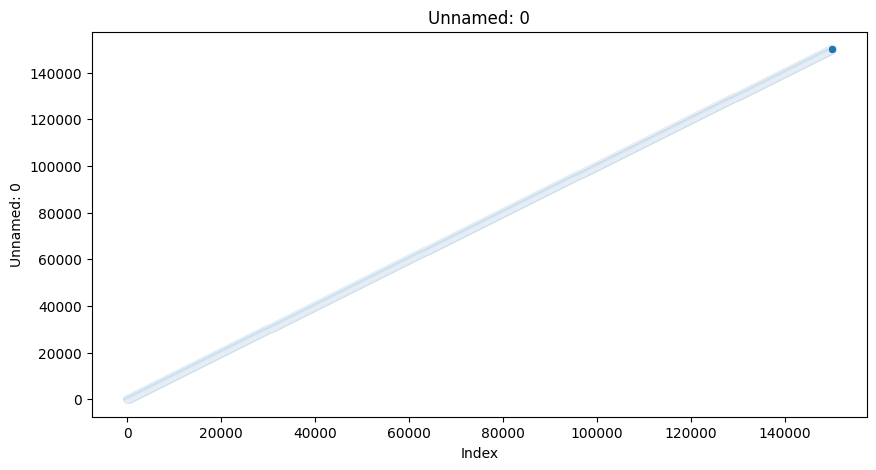

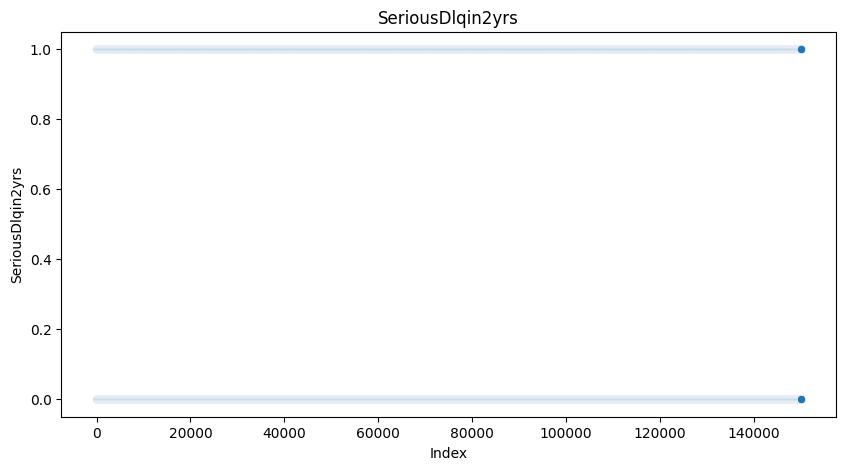

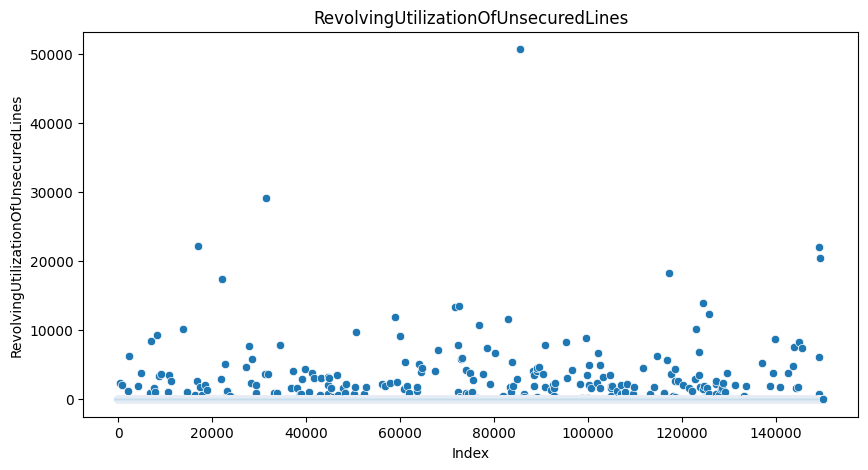

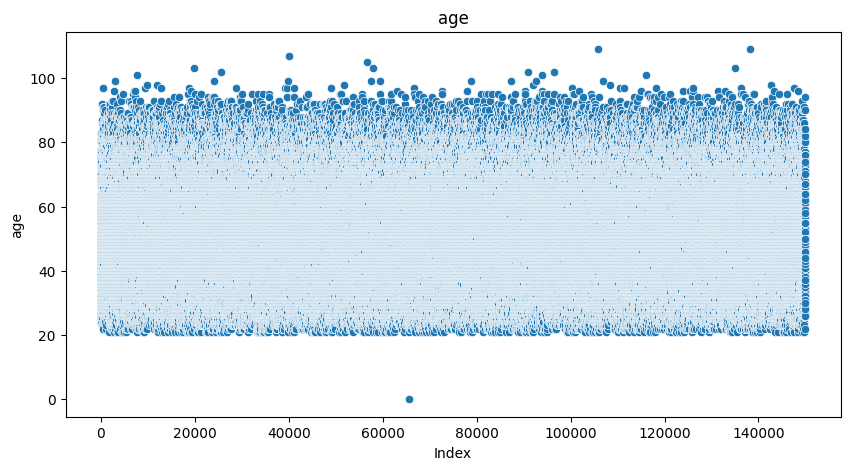

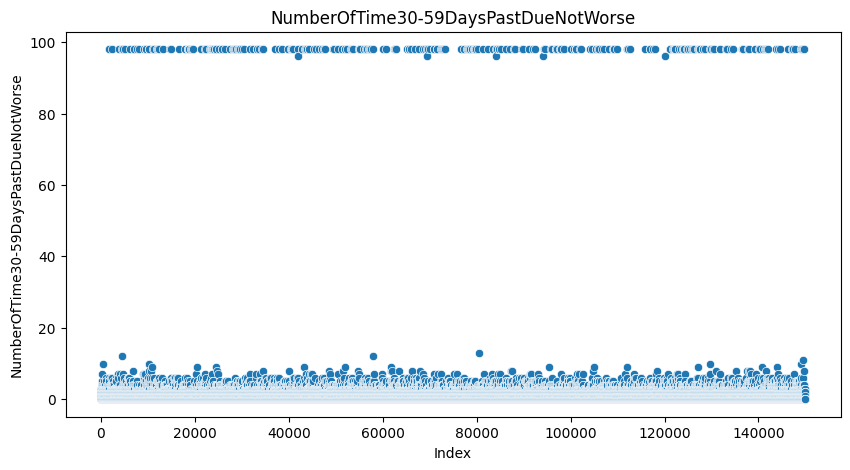

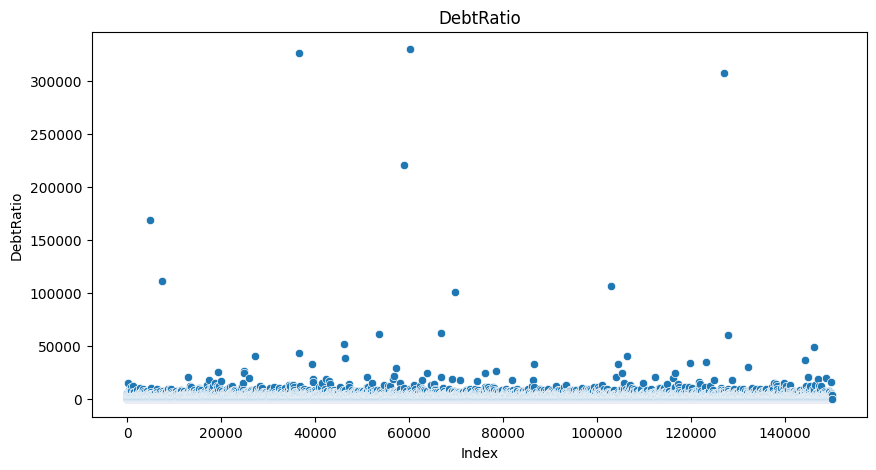

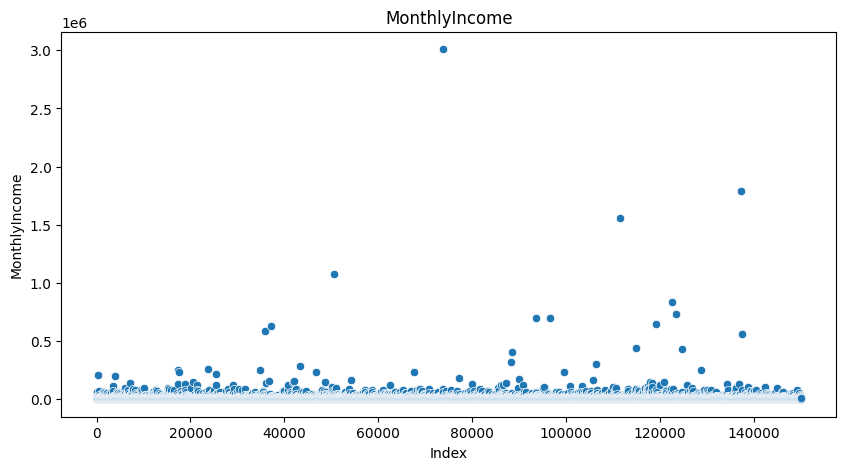

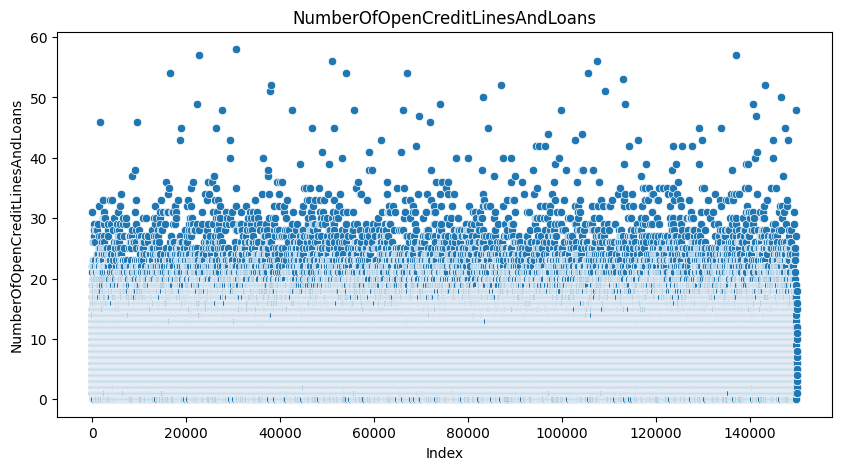

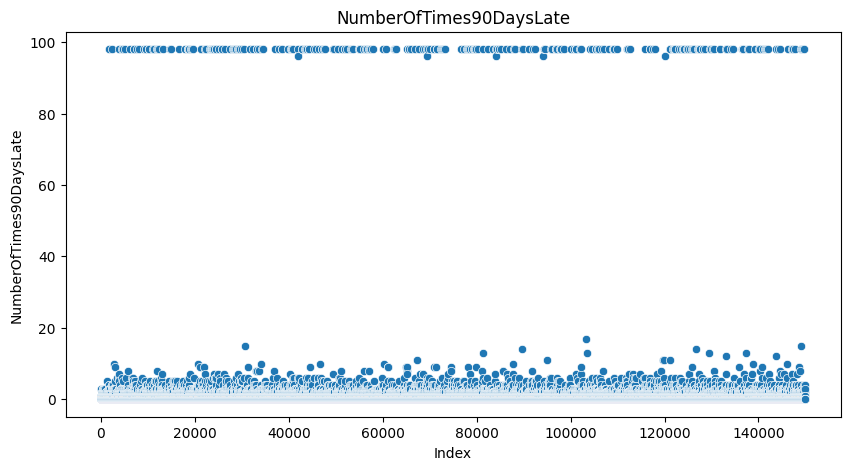

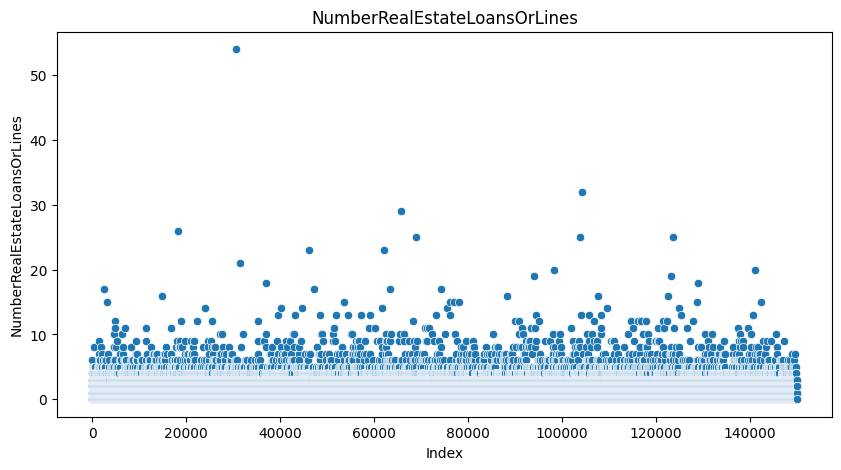

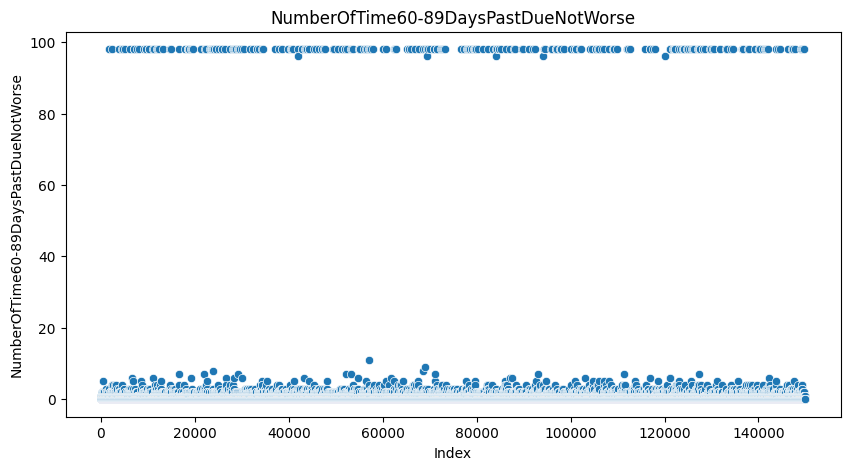

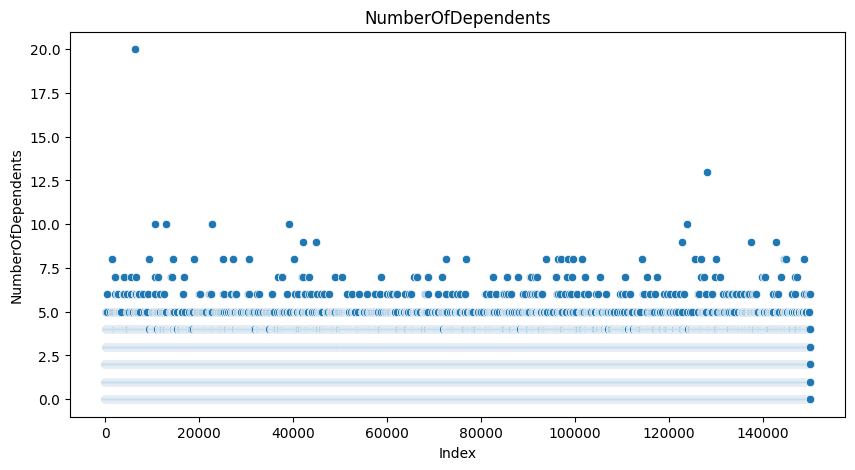

In [141]:
# Numerische Variablen plotten 
for i in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df.index, y=df[i])  # Index auf der x-Achse
    plt.xlabel('Index')
    plt.ylabel(i)
    plt.title(f'{i}')
    plt.show()

## **Datenaufbereitung**

### Duplikate

In [142]:
print('Dieser Datensatz besitz ' + str(df.duplicated().sum()) + ' Duplikate.')

Dieser Datensatz besitz 0 Duplikate.


### NaNs

In [143]:
df.isnull().sum()[df.isnull().sum() > 0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

In [144]:
# Überarbeiten!!!!!!!!

df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)
df['NumberOfDependents'] = df['NumberOfDependents'].astype(int)

/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_70501/926256545.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_70501/926256545.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

### Irrelevante Spalte löschen

In [145]:
print(df.columns)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [146]:
notRelevantVar =['Unnamed: 0']
df.drop(notRelevantVar, axis = 1, inplace = True)

### Kategorische und Numerische Variablen

In [147]:
categoricalVar = [col for col in df if df[col].dtype == 'object']
print('Kategorische Variablen: ' + str(categoricalVar))

numericalVar = [col for col in df if df[col].dtype != 'object']
print('Numerische Variablen: '+ str(numericalVar))

Kategorische Variablen: []
Numerische Variablen: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


### Correlationsmatrix

Text(0.5, 1.0, 'Correlationsmatrix')

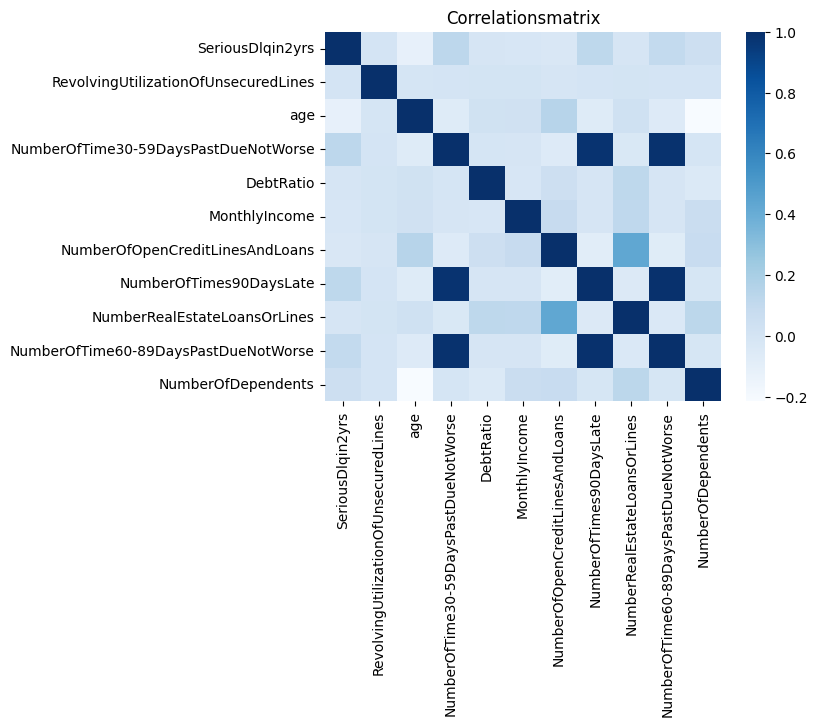

In [148]:
corr_mat = df[numericalVar].corr()

# Heatmap erstellen
sns.heatmap(corr_mat, cmap='Blues')
plt.title('Correlationsmatrix')

In [149]:
# Kopie des aufbereiteten Datensatzes erstellen
df_copy = df

## **Machine Learning** 

### Funktionen für die 

In [150]:
# Ergebnis-DF inizialisieren (für die Speicherung der Evaluationskennzahlen)
df_result = pd.DataFrame(columns=['model','balancedAccuracy', 'precision', 'recall', 'f1', 'rocAuc'])

# Funktion: Ausgewähltes Modell wird trainiert und sagt für Test-Daten ein Label voraus.
# Input: ML-Modell (ml_model), Trainingsdaten-Label (X_train), Trainingsdaten-Feature (y_train), Testdaten-Label (X_test), Testdaten-Features (y_test), Name des zu trainierenden Modells (name), Ergebnistabelle (df_result), Variable, welche angibt, ob eine Klassen-Gewichtung bestimmt werden soll (algoAdaption)
# Output: Vorgergesagt Zielvariable (y_pred_model)
def runModel(ml_model, X_train, y_train, X_test, y_test, name, df_result, algoAdaption = False):

    print('[INFO] Model ' + name + ' started.') # Info-Meldung: Modelltraining Start

    # Modell-Name
    name = name.split()[0]
    name = name.replace(" ", "")

    sampleWeights = compute_sample_weight(class_weight='balanced', y=y_train) if algoAdaption else None # Gewichtigung für das Training
    ml_model.fit(X_train, y_train, sample_weight = sampleWeights) # Modell Training mit Trainings-daten 
    
    y_pred_model = ml_model.predict(X_test) # Bestimmt für das trainierte Modell die Zielvariable 

    print('[INFO] Model ' + name + ' finished.')  # Info-Meldung: Modelltraining Ende

    return(y_pred_model) # Vorhergesagte Zielvariable
           
# Funktion: Bestimmung der Evaluationskenntzahlen des übergebenen Modells
# Input: Vorhergesagter-Wert vom Modell (y_pred_model), tatsächlicher Zielwert (y_test), Modellname (model), Ergebnisstabelle (df_result)
# Output: Angpeasste Ergebnistabelle (df_result) ROC-Daten (fpr, tpr, rocAuc)
def getResults(y_pred_model, y_test, name, df_result):

    balancedAccuracy = balanced_accuracy_score(y_test, y_pred_model)
    precision = precision_score(y_test, y_pred_model)
    recall = recall_score(y_test, y_pred_model)
    f1 = f1_score(y_test, y_pred_model)
    rocAuc = roc_auc_score(y_test, y_pred_model)

    fpr, tpr, _ = roc_curve(y_test, y_pred_model)
    rocAuc = auc(fpr, tpr)

    temp = pd.DataFrame([[name, balancedAccuracy, precision, recall, f1,rocAuc ]], columns=['model','balancedAccuracy', 'precision', 'recall', 'f1', 'rocAuc'])
    df_result = pd.concat([df_result, temp], ignore_index=True)

    return df_result, (fpr, tpr, rocAuc)

def runAndPredict(X_train, y_train, X_test, y_test, df_result, model_kind, balanced = None, weightVar = 'uniform', algo = False ):
    # Model 
    ratioVar = sum(y_train == 0) / sum(y_train == 1)
    ratio = 1 if algo == False else ratioVar

    # 3-ML-Modelle definieren
    rf_model = RandomForestClassifier(random_state=123, class_weight = balanced)
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', random_state=123, n_estimators=500, learning_rate=0.2, scale_pos_weight=ratio )
    logReg_model = LogisticRegression(class_weight=balanced)

    ml_model = {
        f'RF {model_kind}': rf_model,
        f'XGB {model_kind}': xgb_model,
        f'LogReg {model_kind}': logReg_model
    }
    
    roc_data_dict = {}

    for modelName, model in ml_model.items():
        y_pred = runModel(model, X_train, y_train, X_test, y_test, modelName, df_result)
        df_result, roc_data = getResults(y_pred, y_test, modelName, df_result)
        roc_data_dict[modelName] = roc_data

    return df_result, roc_data_dict

### Daten in Test-/Trainingsdaten teilen

In [151]:
# Verteilung der Zielvariabel 
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [152]:
# Daten im Verhätlnis 80%-20% (Training-Test) teilen
y = df['SeriousDlqin2yrs']
X = df.loc[:,df.columns != 'SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Skalierung

In [153]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Erster Durchlauf
Modelle ohne Anpassungen

In [154]:
df_result, roc_data = runAndPredict(X_train_scaled, y_train, X_test_scaled, y_test, df_result, '' )

[INFO] Model RF  started.
[INFO] Model RF finished.
[INFO] Model XGB  started.


/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_70501/3927736124.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result = pd.concat([df_result, temp], ignore_index=True)


[INFO] Model XGB finished.
[INFO] Model LogReg  started.
[INFO] Model LogReg finished.


### Anpassung der Algorithmen
Modelle mit angepassten Gewicht-Parameter

In [155]:
df_result, roc_data_algo = runAndPredict(X_train_scaled, y_train, X_test_scaled, y_test, df_result, 'Algo', balanced = "balanced", weightVar = 'distance', algo = True )

[INFO] Model RF Algo started.
[INFO] Model RF finished.
[INFO] Model XGB Algo started.
[INFO] Model XGB finished.
[INFO] Model LogReg Algo started.
[INFO] Model LogReg finished.


### Undersampling

In [156]:
print('Ursprüngliche Klassenvertilung %s' % Counter(y))

rus = RandomUnderSampler(random_state=123)
X_us, y_us = rus.fit_resample(X, y)

print('Neue Klassenverteilung mit Undersampling:', Counter(y_us))

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size = 0.2, random_state = 123)

Ursprüngliche Klassenvertilung Counter({0: 139974, 1: 10026})
Neue Klassenverteilung mit Undersampling: Counter({0: 10026, 1: 10026})


In [157]:
scaler = StandardScaler()
X_train_us_scaled = scaler.fit_transform(X_train_us)
X_test_us_scaled = scaler.transform(X_test_us)

In [158]:
df_result, roc_data_us = runAndPredict(X_train_us_scaled, y_train_us, X_test_us_scaled, y_test_us, df_result, 'US')

[INFO] Model RF US started.
[INFO] Model RF finished.
[INFO] Model XGB US started.
[INFO] Model XGB finished.
[INFO] Model LogReg US started.
[INFO] Model LogReg finished.


### Oversampling

In [159]:
print('Ursprüngliche Klassenvertilung %s' % Counter(y))

ros = RandomOverSampler(sampling_strategy='minority')
X_os, y_os = ros.fit_resample(X, y)

print('Neue Klassenverteilung mit Oversampling:', Counter(y_os))

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.2, random_state = 123)



Ursprüngliche Klassenvertilung Counter({0: 139974, 1: 10026})
Neue Klassenverteilung mit Oversampling: Counter({1: 139974, 0: 139974})


In [160]:
scaler = StandardScaler()
X_train_os_scaled = scaler.fit_transform(X_train_os)
X_test_os_scaled = scaler.transform(X_test_os)

In [161]:
df_result, roc_data_os = runAndPredict(X_train_os_scaled, y_train_os, X_test_os_scaled, y_test_os, df_result, 'OS' )

[INFO] Model RF OS started.
[INFO] Model RF finished.
[INFO] Model XGB OS started.
[INFO] Model XGB finished.
[INFO] Model LogReg OS started.
[INFO] Model LogReg finished.


### SMOTE

In [162]:
from imblearn.over_sampling import SMOTE

print('Ursprüngliche Klassenvertilung %s' % Counter(y))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Neue Klassenverteilung mit SMOTE:', Counter(y_train_smote))


Ursprüngliche Klassenvertilung Counter({0: 139974, 1: 10026})
Neue Klassenverteilung mit SMOTE: Counter({0: 111960, 1: 111960})


In [163]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_smote_scaled = scaler.transform(X_test)

In [164]:
df_result, roc_data_smote = runAndPredict(X_train_smote_scaled, y_train_smote, X_test_smote_scaled, y_test, df_result, 'SMOTE')

[INFO] Model RF SMOTE started.
[INFO] Model RF finished.
[INFO] Model XGB SMOTE started.
[INFO] Model XGB finished.
[INFO] Model LogReg SMOTE started.
[INFO] Model LogReg finished.


## **Evaluation**

### Vergleich der Evaluationskennzahlen (Tabelle)

In [165]:
df_result = df_result.sort_values(by='model')
df_result

,model,balancedAccuracy,precision,recall,f1,rocAuc
2,LogReg,0.517722,0.535714,0.037764,0.070555,0.517722
5,LogReg Algo,0.720842,0.172967,0.668177,0.274798,0.720842
11,LogReg OS,0.712477,0.744272,0.649247,0.693520,0.712477
14,LogReg SMOTE,0.651476,0.124481,0.604230,0.206434,0.651476
8,LogReg US,0.709800,0.739695,0.650447,0.692206,0.709800
0,RF,0.584077,0.533733,0.179255,0.268375,0.584077
3,RF Algo,0.573049,0.525424,0.156093,0.240683,0.573049
9,RF OS,0.986622,0.974079,1.000000,0.986869,0.986622
12,RF SMOTE,0.713807,0.207332,0.586606,0.306377,0.713807
6,RF US,0.771450,0.782295,0.754717,0.768259,0.771450


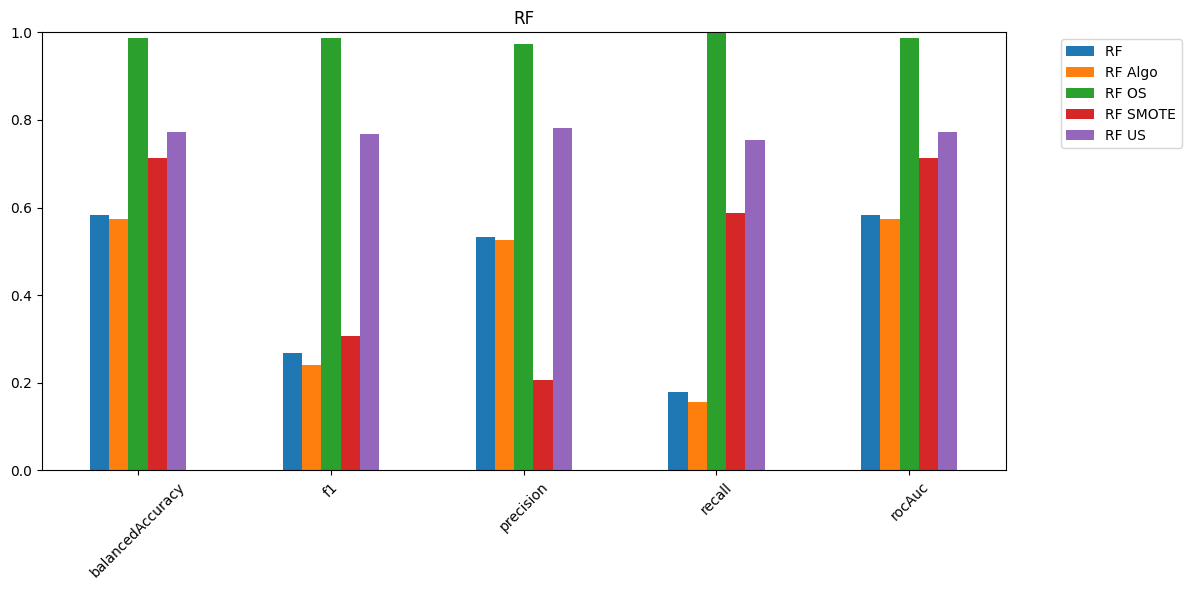

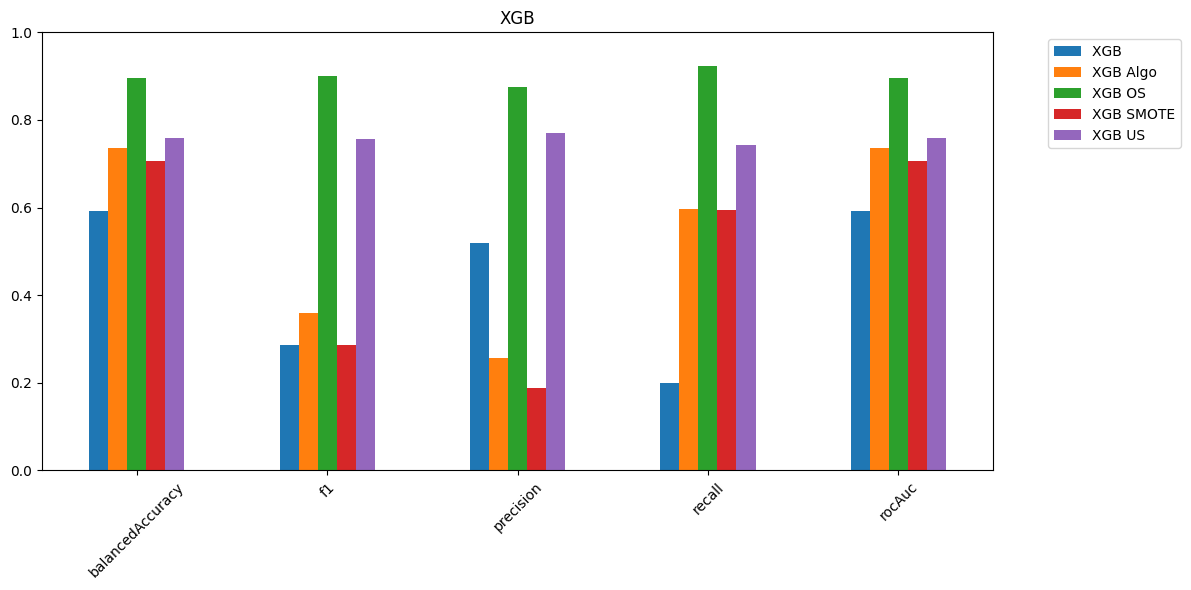

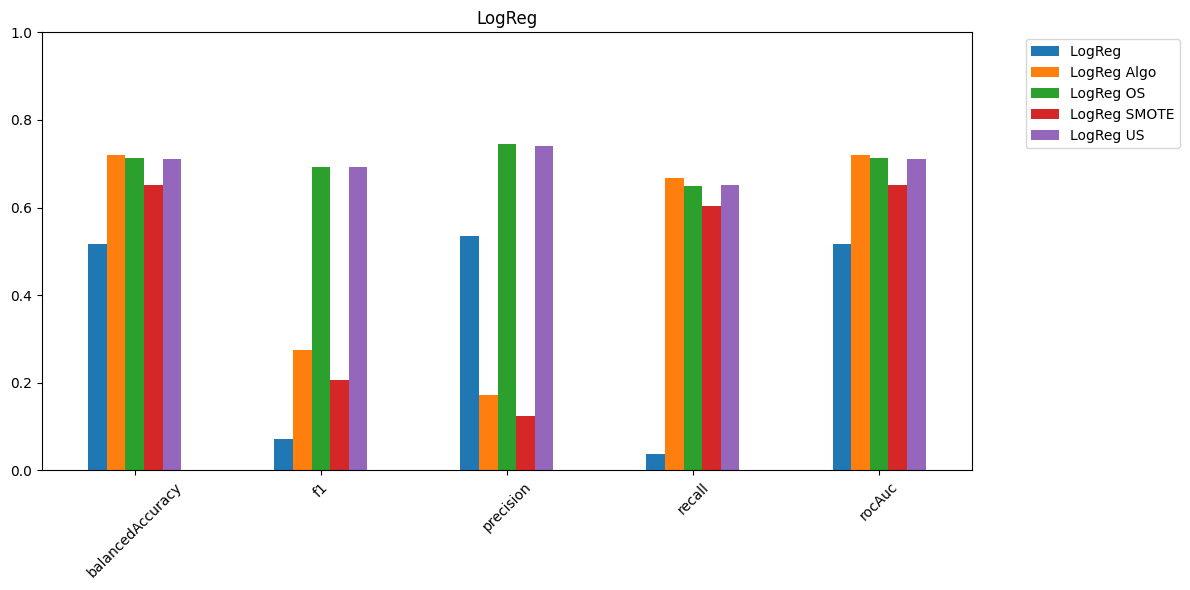

In [170]:
models = ['RF', 'XGB', 'LogReg']

for i in models:
    df_temp = df_result[df_result["model"].str.contains(i)]
    df_temp = df_temp.melt(id_vars="model", var_name="metric", value_name="value")
    df_temp = df_temp.pivot(index="metric", columns="model", values="value")

    df_temp.plot(kind="bar", figsize=(12, 6))
    plt.title(i)
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylim(0, 1) 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Vergleich der Evaluationskennzahlen (Grafiken)

In [166]:
# Funktion: Erstellung ROC-Kurve für die drei ML-Modelle
# Input: ROC-Daten (roc_data)
# Funktionsweise: Basierend auf den gespeicherten ROC-Daten wird die ROC-Kurve für die drei ML-Modell dargestellt.
def plot_roc_curve(roc_data):
    plt.figure(figsize=(8, 6))

    # Farben der einzelnen ML-Modelle festlegen
    colors = {
        'RF': 'blue',
        'XGB': 'red',
        'LogReg': 'orange'
    }

    # Pro Modell wird die dazugehörige ROC-Kurve in die Grafik eingezeichnet
    for model_name, (fpr, tpr, auc) in roc_data.items():
        plt.plot(fpr, tpr, color=colors.get(model_name.split()[0], 'black'), lw=1,
                 label=f'{model_name} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=0.5, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Receiver Operating Characteristic (ROC) Kurve')
    plt.legend(loc="lower right")
    plt.show()


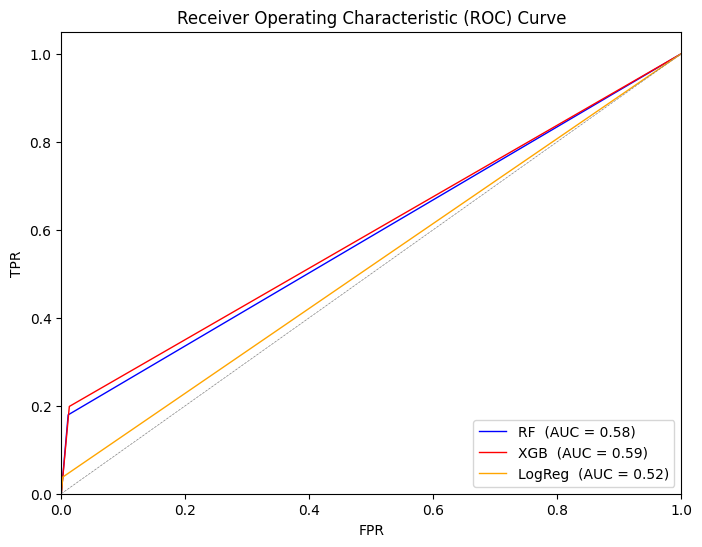

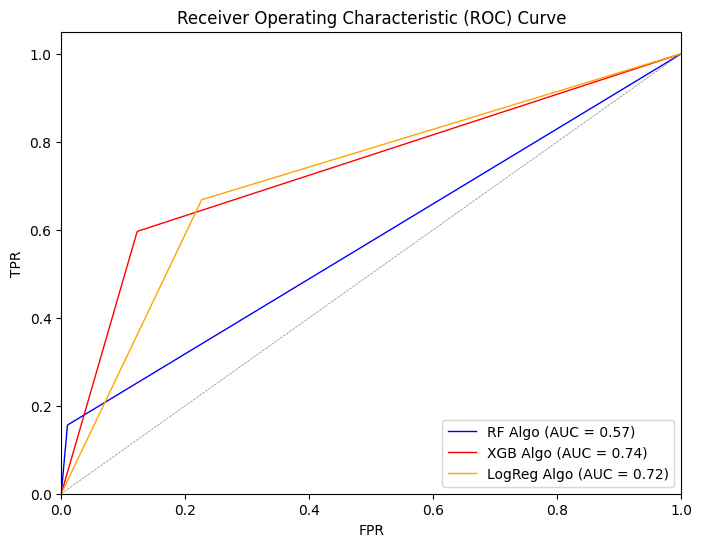

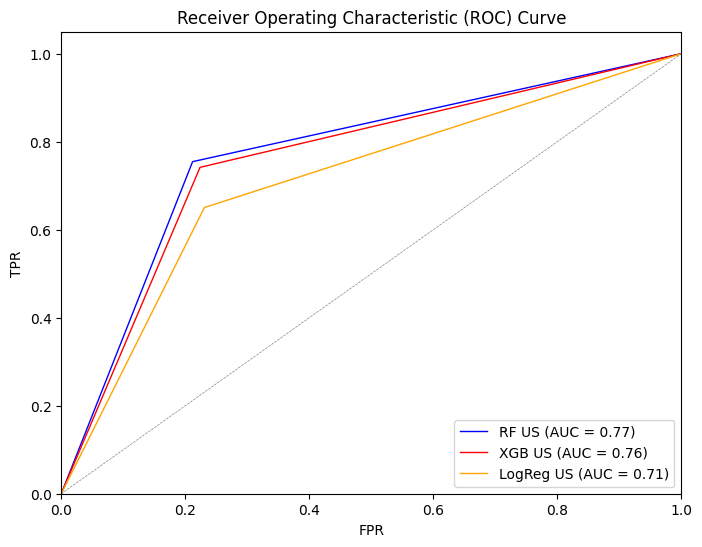

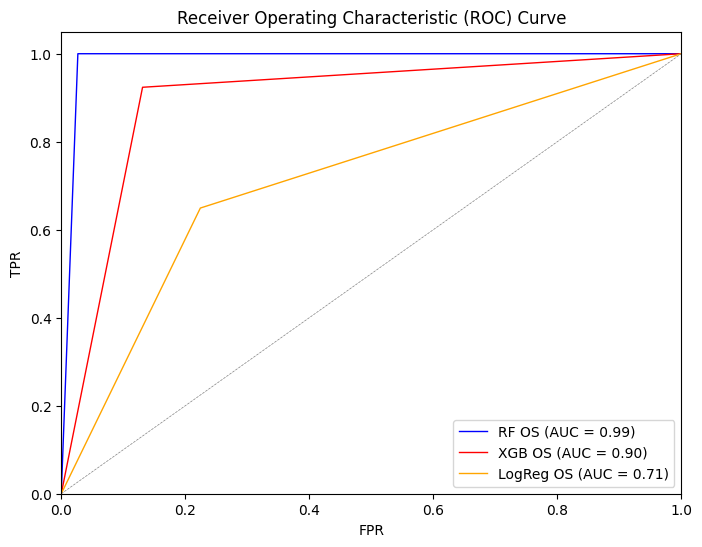

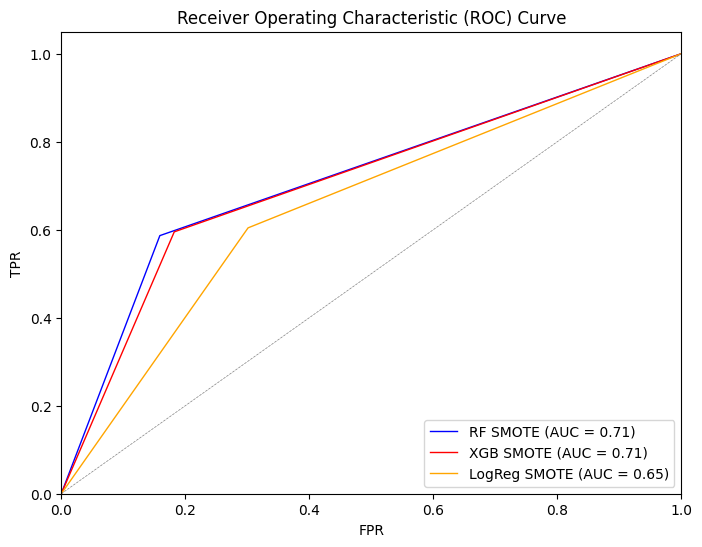

In [167]:
# ROC-Kurven-Plots
roc_data_list = [roc_data, roc_data_algo, roc_data_us, roc_data_os, roc_data_smote] # Speicherung der einzelnen ROC-Daten in einer Liste

for i in roc_data_list: # Für jede Imbalanced-Daten-Methode wird eine ROC-Kurve geplottet
    plot_roc_curve(i)

plt.show()


***
***